<a href="https://colab.research.google.com/github/M-Tehrani/NLP/blob/main/RNN_Simple_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

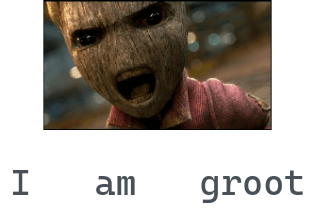

Let’s take a simple example of encoding the meaning of a whole sentence using an RNN layer in Keras.

To use this sentence in an RNN, we need to first convert it into numeric form. We could either use one-hot encoding, pretrained word vectors, or learn word embeddings from scratch. For simplicity, let’s assume we used some word embedding to convert each word into 2 numbers.



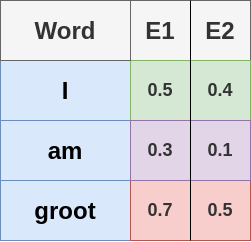

Now, to pass these words into an RNN, we treat each word as a time-step and the embedding as features. Let’s build an RNN layer to pass these into

In [ ]:
model = keras.Sequential()
model.add(SimpleRNN(4, input_shape=(3, 2)))

NameError: ignored

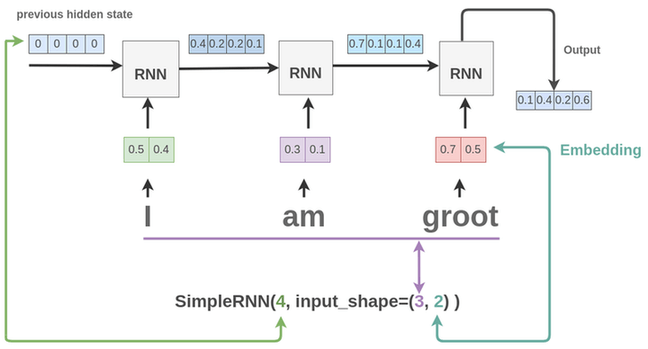

As seen above, here is what the various parameters means and why they were set as such:

#input_shape=(3, 2):
We have 3 words: I, am, groot. So, number of time-steps is 3. The RNN block unfolds 3 times, and so we see 3 blocks in the figure.
For each word, we pass the word embedding of size 2 to the network.

#SimpleRNN(4, …):

  This means we have 4 units in the hidden layer.

  So, in the figure, we see how a hidden state of size 4 is passed between the RNN blocks

  For the first block, since there is no previous output, so previous hidden state is set to [0, 0, 0, 0]

Thus for a whole sentence, we get a vector of size 4 as output from the RNN layer as shown in the figure. You can verify this by printing the shape of the output from the layer.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN

x = tf.random.normal((1, 3, 2))

layer = SimpleRNN(4, input_shape=(3, 2))
output = layer(x)

print(output.shape)
# (1, 4)

(1, 4)


As seen, we create a random batch of input data with 1 sentence having 3 words and each word having an embedding of size 2. After passing through the LSTM layer, we get back a representation of size 4 for that one sentence.

This can be combined with a Dense layer to build an architecture for something like sentiment analysis or text classification.

In [ ]:
model = keras.Sequential()
model.add(SimpleRNN(4, input_shape=(3, 2)))
model.add(layers.Dense(1))

# Multiple Output

Keras provides a *return_sequences* parameter to control output from the RNN cell. If we set it to *True*, what it means is that the output from each unfolded RNN cell is returned instead of only the last cell.

In [ ]:
model = keras.Sequential()
model.add(SimpleRNN(4, input_shape=(3, 2), 
                    return_sequences=True))

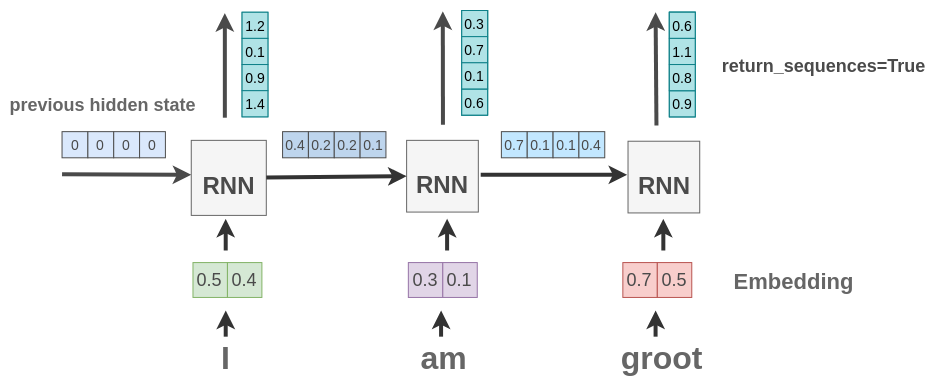

As seen above, we get an output vector of size 4 for each word in the sentence.

This can be verified by the below code where we send one sentence with 3 words and embedding of size 2 for each word. As seen, the layer gives us back 3 outputs with a vector of size 4 for each word.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN

x = tf.random.normal((1, 3, 2))

layer = SimpleRNN(4, input_shape=(3, 2), return_sequences=True)
output = layer(x)

print(output.shape)
# (1, 3, 4)

(1, 3, 4)


# TimeDistributed Layer

Suppose we want to recognize entities in a text. For example, in our text “I am Groot”, we want to identify “Groot” as a name.

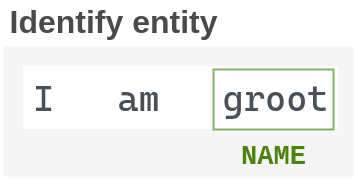

We have already seen how to get output for each word in the sentence in the previous section. Now, we need some way to apply classification on the output vector from the RNN cell on each word. For simple cases such as text classification, you know how we use the Dense() layer with softmax activation as the last layer.

Similar to that, we can apply Dense() layer on multiple outputs from the RNN layer through a wrapper layer called TimeDistributed(). It will apply the Dense layer on each output and give us class probability scores for the entities.

In [ ]:
from tensorflow.python.keras.layers.core import Dense
model = keras.Sequential()
model.add(SimpleRNN(4, input_shape=(3, 2), 
                    return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(layers.Dense(4, activation='softmax')))

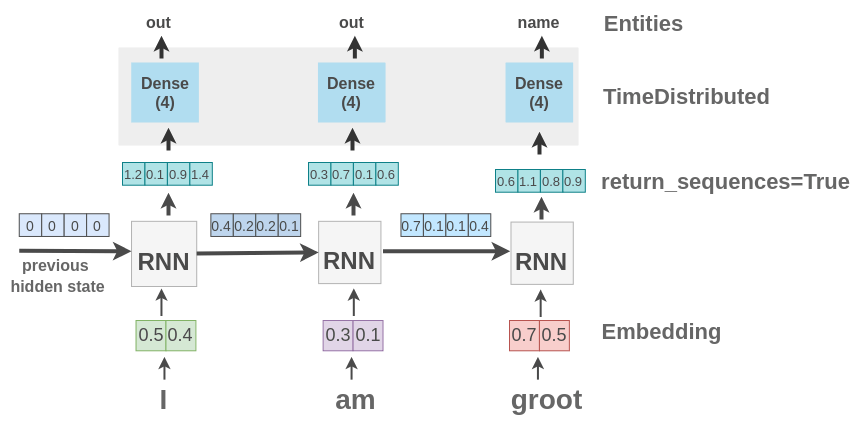

As seen, we take a 3 word sentence and classify output of RNN for each word into 4 classes using Dense layer. These classes can be the entities like name, person, location etc.

# Stacking Layers

We can also stack multiple recurrent layers one after another in Keras.

In [ ]:
model = keras.Sequential()
model.add(SimpleRNN(4, input_shape=(3, 2), return_sequences=True))
model.add(SimpleRNN(4))

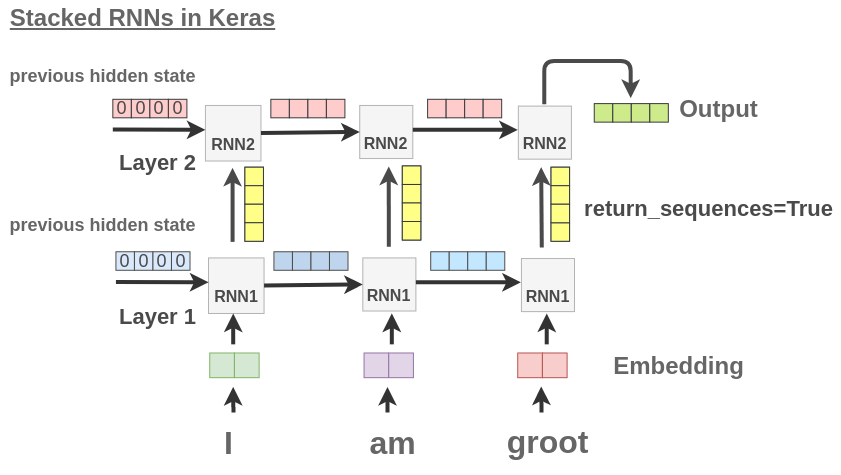

## Note: Why do we usually set return_sequences to True for all layers except the final?

Since the second layer needs inputs from the first layer, we set return_sequence=True for the first SimpleRNN layer. For the second layer, we usually set it to False if we are going to just be doing text classification. If out task is NER prediction, we can set it to True in the final layer as well.